<a href="https://colab.research.google.com/github/nannthd/project_AIEngineer/blob/main/drug_yolov8_augment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/107.7 GB disk)


In [ ]:
!pip install pytube opencv-python-headless

In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

## Custom Training

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AWtZRbYK04sFZNNZ1t4X")
project = rf.workspace("projectaiengineer").project("all_drug-2")
version = project.version(1)
dataset = version.download("yolov8")

In [ ]:
%cat {dataset.location}/data.yaml

In [7]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
%cat {dataset.location}/data.yaml

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=50 imgsz=640 batch=16 plots=True \
model=yolov8n.pt \
data={dataset.location}/data.yaml \
# augment=True \
dropout=0.3
device=0

In [ ]:
!ls {HOME}/runs/detect/train/

In [11]:
from IPython.display import Image, clear_output

/content


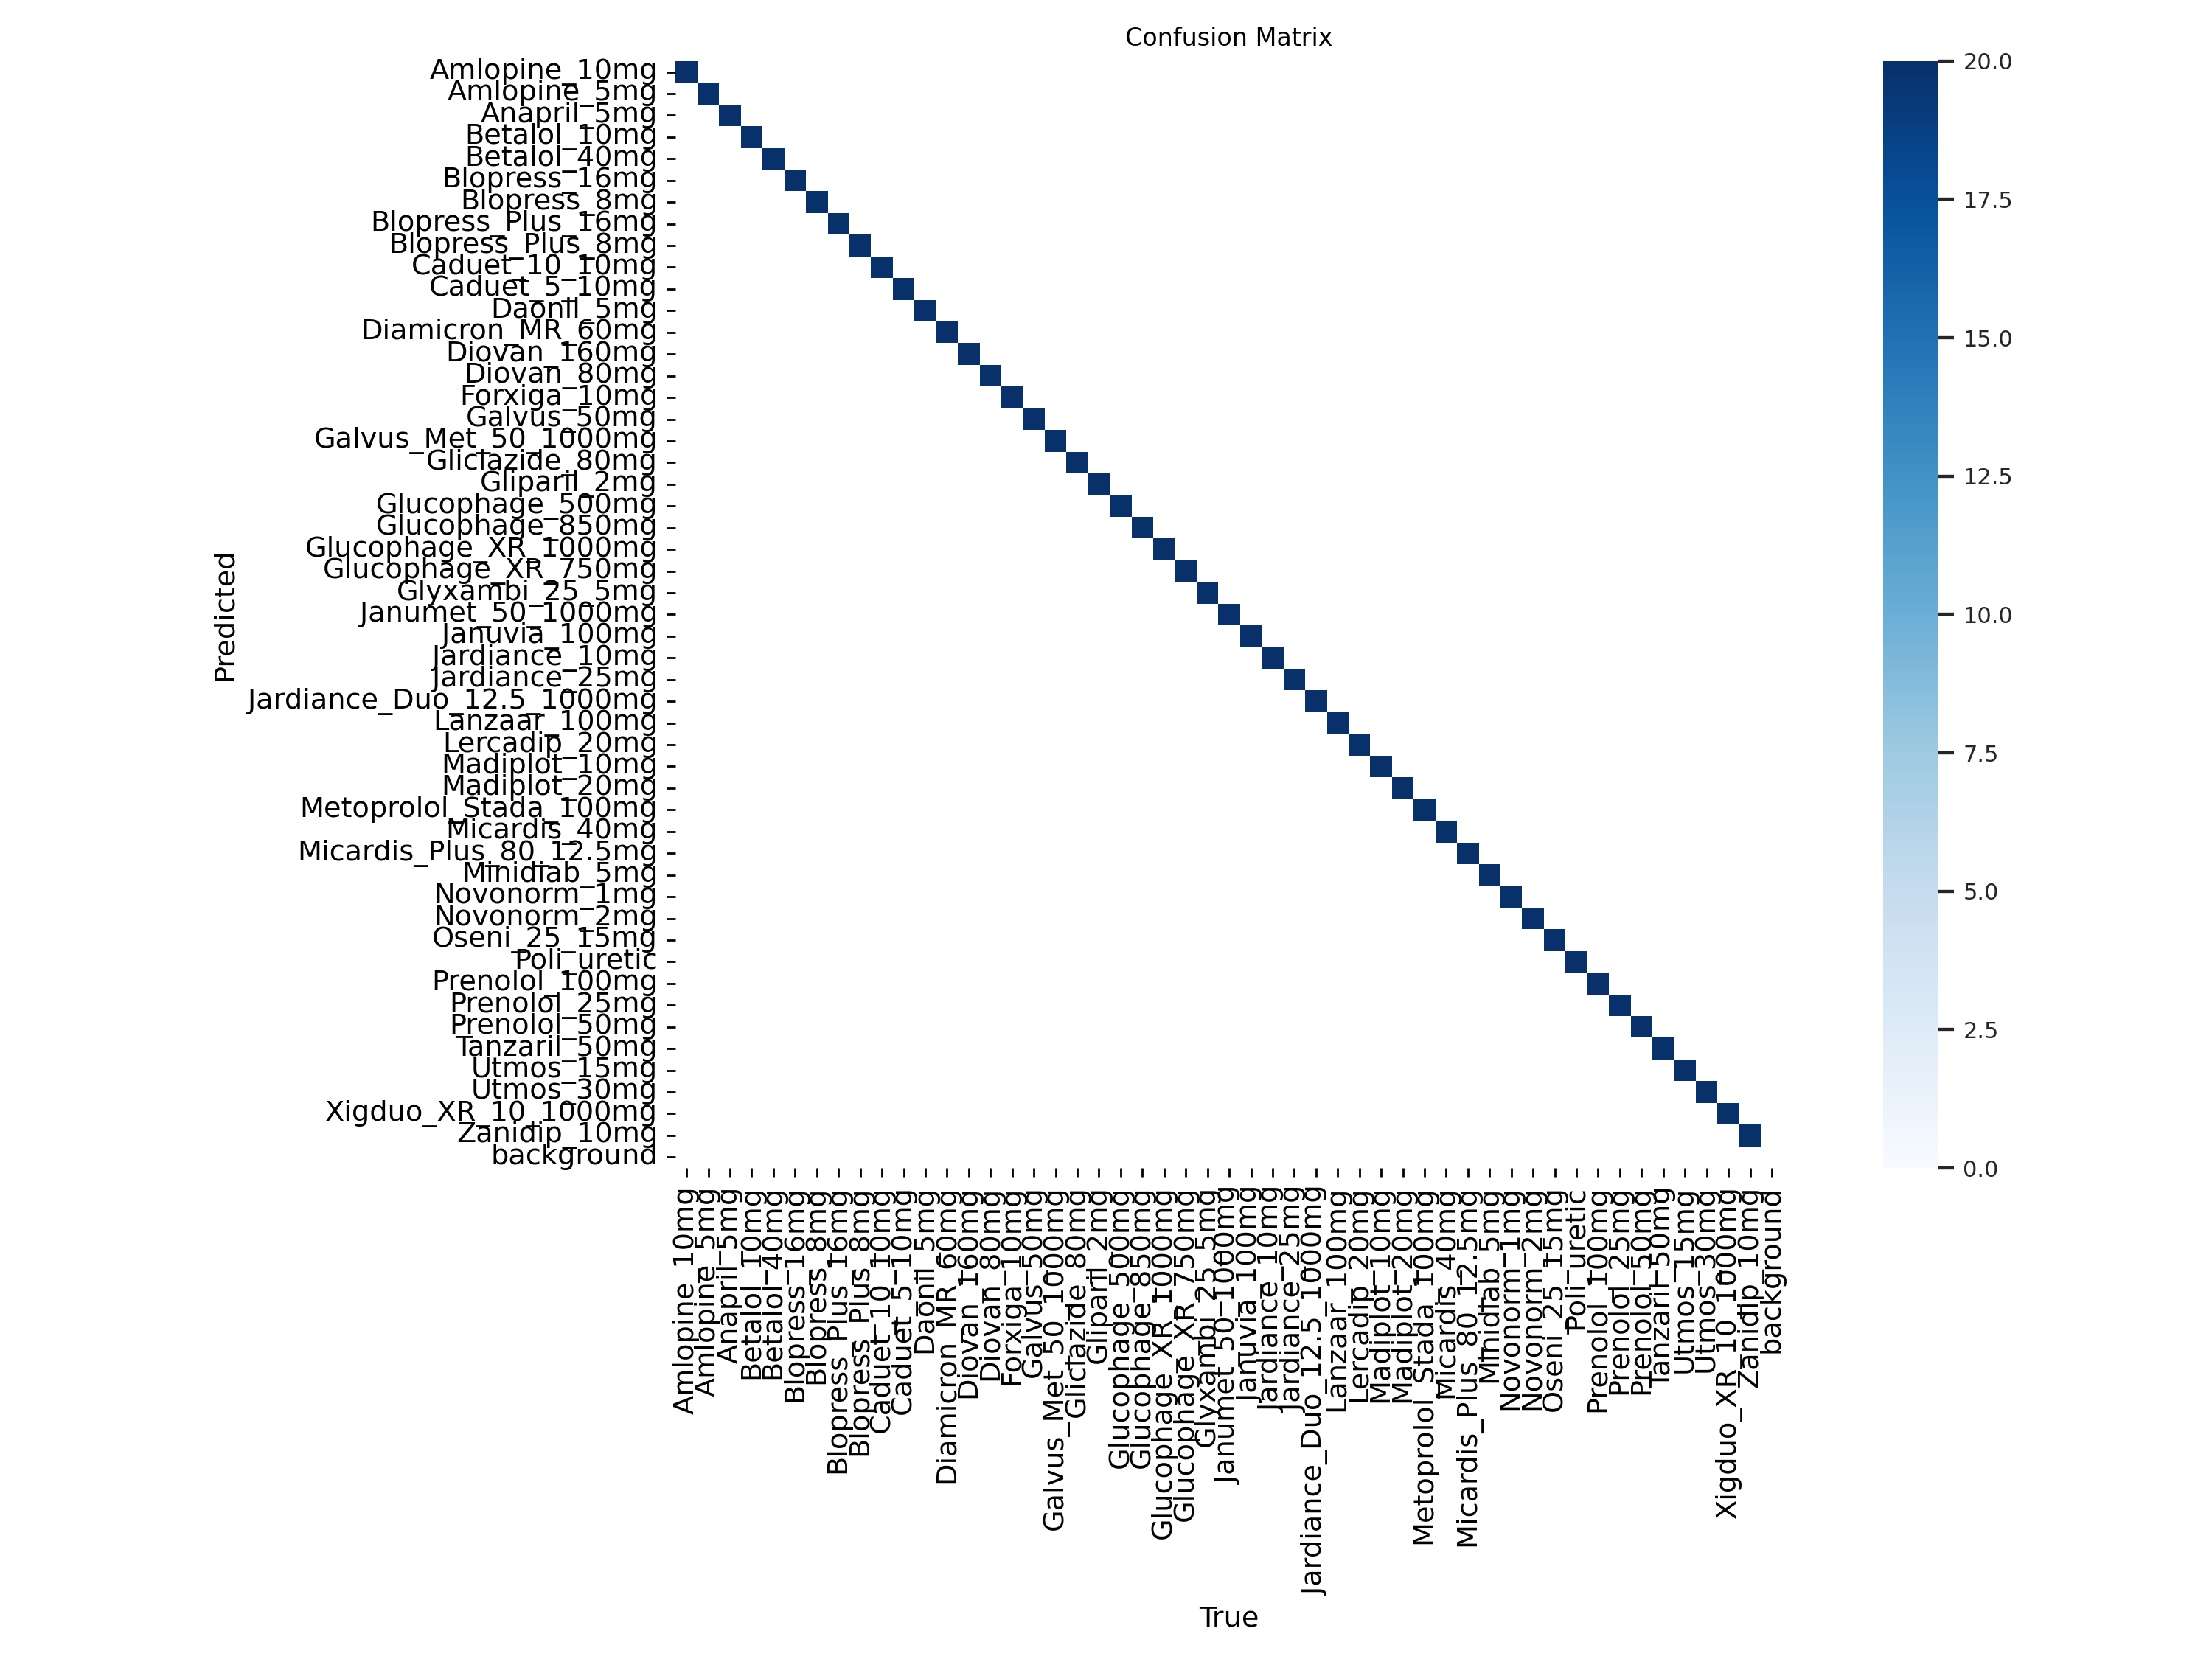

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


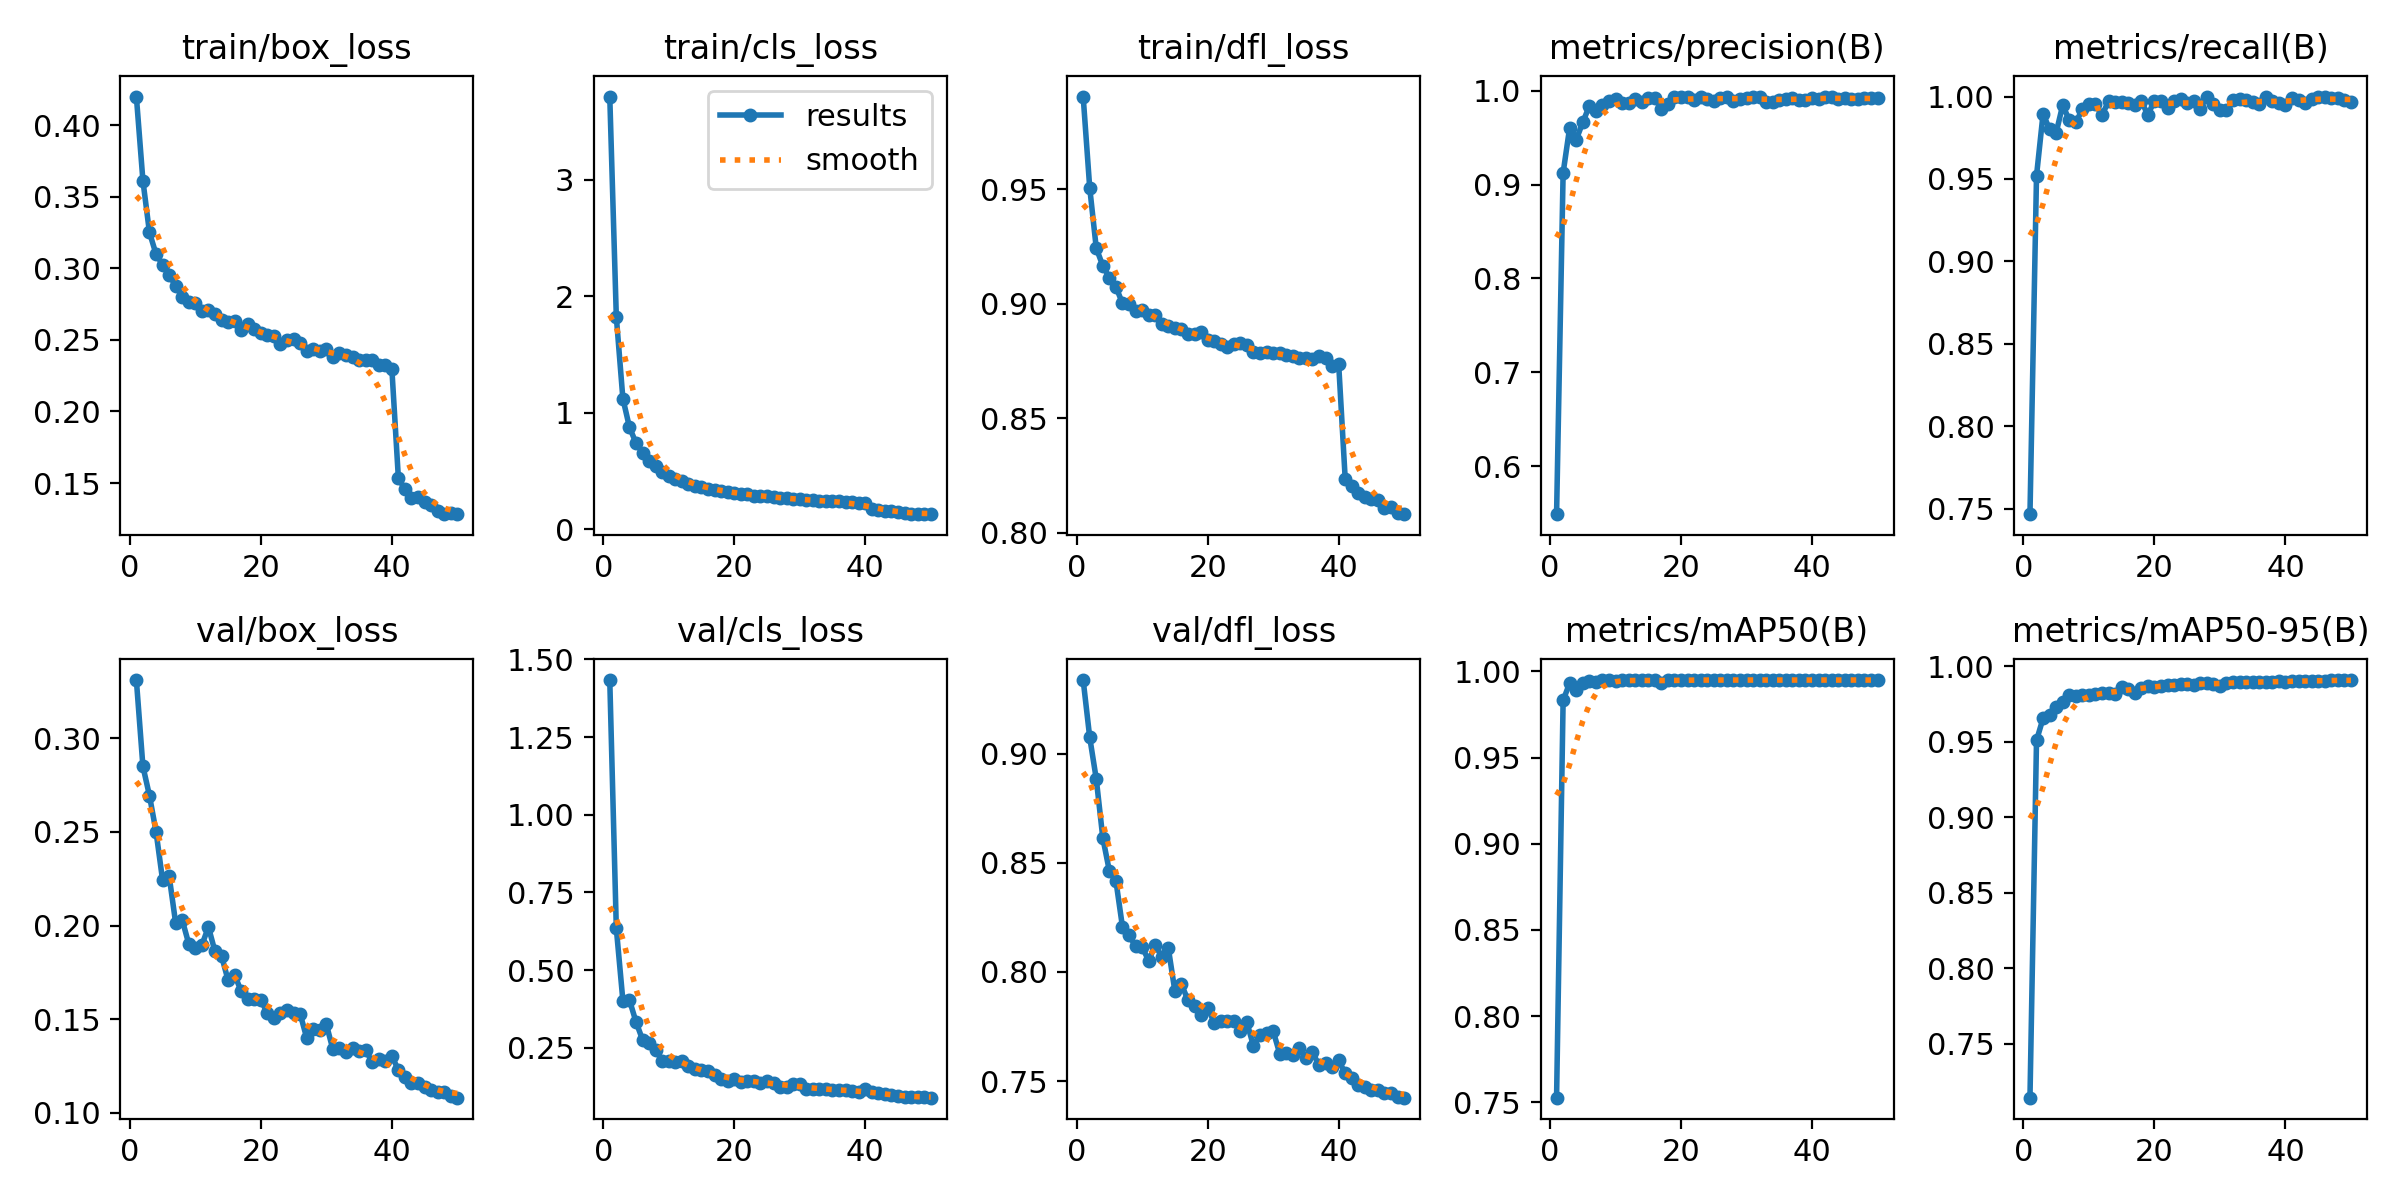

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [ ]:
!pip install supervision
import supervision as sv

In [15]:
from ultralytics import YOLO

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


**NOTE:** Let's randomly select an image from our validation set and visualize the results.

In [ ]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.

0: 640x640 1 Betalol_40mg, 382.4ms
Speed: 11.5ms preprocess, 382.4ms inference, 30.9ms postprocess per image at shape (1, 3, 640, 640)
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.

0: 640x640 1 Galvus_Met_50_1000mg, 322.7ms
Speed: 4.3ms preproce

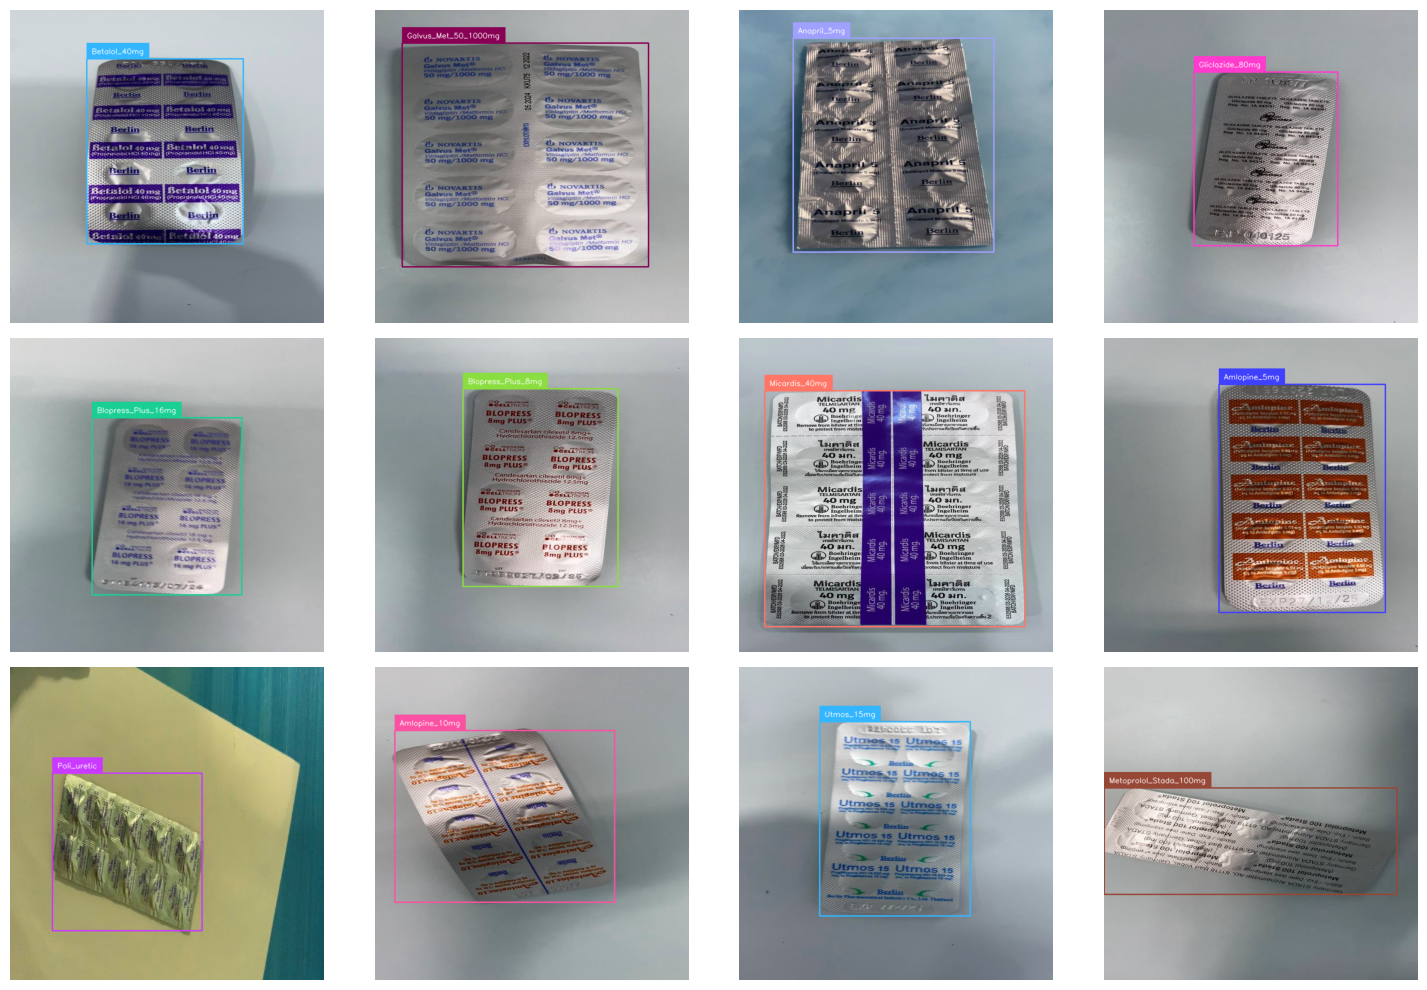

In [10]:
from ultralytics import YOLO
import supervision as sv
import matplotlib.pyplot as plt
import random

# Load the YOLOv8 model
model = YOLO('/content/best.pt')

# Load the dataset
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

# Initialize annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Randomly select 12 images from the dataset
random_images = random.sample(list(dataset.images.keys()), 12)

# Prepare the images for display in a grid
processed_images = []

for image_key in random_images:
    random_image = dataset.images[image_key]

    # Perform detection
    results = model(source=random_image, conf=0.25)[0]
    detections = sv.Detections.from_ultralytics(results)

    # Annotate the image
    annotated_image = bounding_box_annotator.annotate(scene=random_image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Append the annotated image to the list
    processed_images.append(annotated_image)

# Display the images in a grid
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # 3 rows and 4 columns

for i, ax in enumerate(axes.flatten()):
    ax.imshow(processed_images[i])
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()